In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots


import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
train_x = train_images/255.0
test_x = test_images/255.0

train_y = tf.keras.utils.to_categorical(train_labels)
test_y = tf.keras.utils.to_categorical(test_labels)

In [4]:
def valid_callback(name):
    return [tf.keras.callbacks.EarlyStopping(monitor='val_ce', patience=20),
           tfdocs.modeling.EpochDots()]

In [5]:
def compile_and_fit(model, name, max_epochs=1000):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=[tf.keras.losses.CategoricalCrossentropy(from_logits=True, name='ce'),'accuracy'])
    
    history = model.fit(train_x, train_y, 
                        epochs=max_epochs, 
                        batch_size = 64,
                        callbacks=valid_callback(name), 
                        validation_data=(test_x, test_y))
    
    return history

histories={}

In [6]:
small = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10)
])

histories['small'] = compile_and_fit(small, 'small')

Epoch 1/1000
757/782 [============================>.] - ETA: 0s - loss: 1.8958 - ce: 1.8958 - accuracy: 0.3088
Epoch: 0, accuracy:0.3102,  ce:1.8915,  loss:1.8916,  val_accuracy:0.3505,  val_ce:1.8034,  val_loss:1.8040,  
782/782 [==============================] - 2s 2ms/step - loss: 1.8916 - ce: 1.8915 - accuracy: 0.3102 - val_loss: 1.8040 - val_ce: 1.8034 - val_accuracy: 0.3505
Epoch 2/1000
782/782 [==============================] - 1s 2ms/step - loss: 1.7277 - ce: 1.7279 - accuracy: 0.3777 - val_loss: 1.6916 - val_ce: 1.6911 - val_accuracy: 0.3949
Epoch 3/1000
782/782 [==============================] - 1s 2ms/step - loss: 1.6628 - ce: 1.6626 - accuracy: 0.4012 - val_loss: 1.6099 - val_ce: 1.6098 - val_accuracy: 0.4267
Epoch 4/1000
782/782 [==============================] - 1s 2ms/step - loss: 1.6116 - ce: 1.6114 - accuracy: 0.4234 - val_loss: 1.6063 - val_ce: 1.6066 - val_accuracy: 0.4253
Epoch 5/1000
782/782 [==============================] - 1s 2ms/step - loss: 1.5803 - ce: 1.5799

Epoch 47/1000
782/782 [==============================] - 1s 2ms/step - loss: 1.3252 - ce: 1.3253 - accuracy: 0.5252 - val_loss: 1.5008 - val_ce: 1.5003 - val_accuracy: 0.4699
Epoch 48/1000
782/782 [==============================] - 1s 2ms/step - loss: 1.3285 - ce: 1.3289 - accuracy: 0.5231 - val_loss: 1.4449 - val_ce: 1.4443 - val_accuracy: 0.4870
Epoch 49/1000
782/782 [==============================] - 1s 2ms/step - loss: 1.3229 - ce: 1.3235 - accuracy: 0.5255 - val_loss: 1.4677 - val_ce: 1.4669 - val_accuracy: 0.4829
Epoch 50/1000
782/782 [==============================] - 1s 2ms/step - loss: 1.3210 - ce: 1.3211 - accuracy: 0.5270 - val_loss: 1.4657 - val_ce: 1.4654 - val_accuracy: 0.4841
Epoch 51/1000
782/782 [==============================] - 1s 2ms/step - loss: 1.3190 - ce: 1.3190 - accuracy: 0.5242 - val_loss: 1.4867 - val_ce: 1.4861 - val_accuracy: 0.4798
Epoch 52/1000
782/782 [==============================] - 1s 2ms/step - loss: 1.3145 - ce: 1.3147 - accuracy: 0.5274 - val_los

In [7]:
medium = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10)
])

histories['medium'] = compile_and_fit(medium, 'medium')

Epoch 1/1000
766/782 [============================>.] - ETA: 0s - loss: 1.8749 - ce: 1.8749 - accuracy: 0.3178
Epoch: 0, accuracy:0.3191,  ce:1.8710,  loss:1.8717,  val_accuracy:0.3815,  val_ce:1.7137,  val_loss:1.7149,  
782/782 [==============================] - 2s 2ms/step - loss: 1.8717 - ce: 1.8710 - accuracy: 0.3191 - val_loss: 1.7149 - val_ce: 1.7137 - val_accuracy: 0.3815
Epoch 2/1000
782/782 [==============================] - 2s 2ms/step - loss: 1.6928 - ce: 1.6928 - accuracy: 0.3935 - val_loss: 1.6323 - val_ce: 1.6326 - val_accuracy: 0.4130
Epoch 3/1000
782/782 [==============================] - 2s 2ms/step - loss: 1.6152 - ce: 1.6147 - accuracy: 0.4224 - val_loss: 1.5733 - val_ce: 1.5725 - val_accuracy: 0.4373
Epoch 4/1000
782/782 [==============================] - 2s 2ms/step - loss: 1.5699 - ce: 1.5700 - accuracy: 0.4387 - val_loss: 1.5905 - val_ce: 1.5909 - val_accuracy: 0.4265
Epoch 5/1000
782/782 [==============================] - 2s 2ms/step - loss: 1.5289 - ce: 1.5287

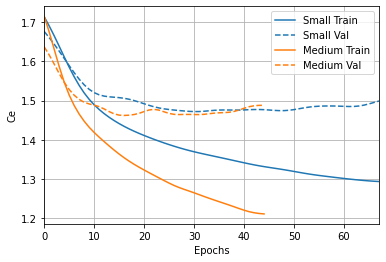

In [8]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'ce', smoothing_std=10)
plotter.plot(histories)

In [9]:
large = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(10)
])

histories['large'] = compile_and_fit(large, 'large')

Epoch 1/1000
782/782 [==============================] - ETA: 0s - loss: 1.8472 - ce: 1.8469 - accuracy: 0.3290
Epoch: 0, accuracy:0.3290,  ce:1.8469,  loss:1.8472,  val_accuracy:0.3938,  val_ce:1.6745,  val_loss:1.6749,  
782/782 [==============================] - 8s 10ms/step - loss: 1.8472 - ce: 1.8469 - accuracy: 0.3290 - val_loss: 1.6749 - val_ce: 1.6745 - val_accuracy: 0.3938
Epoch 2/1000
782/782 [==============================] - 10s 13ms/step - loss: 1.6626 - ce: 1.6623 - accuracy: 0.4020 - val_loss: 1.6058 - val_ce: 1.6058 - val_accuracy: 0.4158
Epoch 3/1000
782/782 [==============================] - 10s 13ms/step - loss: 1.5749 - ce: 1.5750 - accuracy: 0.4328 - val_loss: 1.5291 - val_ce: 1.5289 - val_accuracy: 0.4514
Epoch 4/1000
782/782 [==============================] - 13s 16ms/step - loss: 1.5131 - ce: 1.5128 - accuracy: 0.4579 - val_loss: 1.5884 - val_ce: 1.5895 - val_accuracy: 0.4414
Epoch 5/1000
782/782 [==============================] - 13s 17ms/step - loss: 1.4699 - c

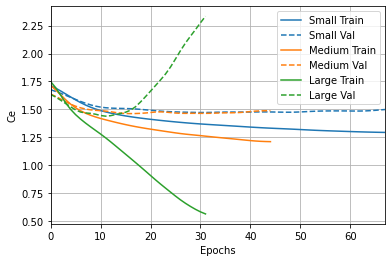

In [10]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'ce', smoothing_std=10)
plotter.plot(histories)

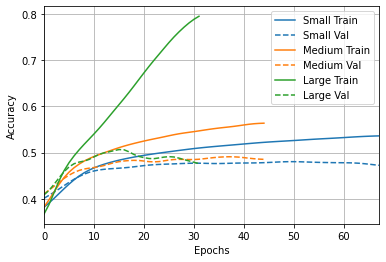

In [11]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)